In [1]:
!pip install numpy opencv-python matplotlib pillow


In [4]:
!mkdir -p models


In [6]:
import urllib.request
import os

In [7]:
os.makedirs("models", exist_ok=True)

In [11]:
urllib.request.urlretrieve(
    "https://github.com/richzhang/colorization/blob/caffe/colorization/resources/pts_in_hull.npy?raw=true",
    "pts_in_hull.npy"
)

('pts_in_hull.npy', <http.client.HTTPMessage at 0x2d32047ae70>)

In [12]:
urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/richzhang/colorization/caffe/colorization/models/colorization_deploy_v2.prototxt",
    "models/colorization_deploy_v2.prototxt"
)

('models/colorization_deploy_v2.prototxt',
 <http.client.HTTPMessage at 0x2d32047b980>)

In [1]:
import urllib.request
import os

# Make sure the models directory exists
os.makedirs("models", exist_ok=True)

# Download from Dropbox mirror
url = "https://www.dropbox.com/scl/fi/d8zffur3wmd4wet58dp9x/colorization_release_v2.caffemodel?rlkey=iippu6vtsrox3pxkeohcuh4oy&dl=1"
output_path = "models/colorization_release_v2.caffemodel"

print("Downloading colorization_release_v2.caffemodel (this may take a minute)...")
urllib.request.urlretrieve(url, output_path)
print("Download complete!")


Download complete!


In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [3]:
frame = cv.imread("new.jpg")

In [4]:
numpy_file = np.load('./pts_in_hull.npy')
Caffe_net = cv.dnn.readNetFromCaffe(
    "./models/colorization_deploy_v2.prototxt",
    "./models/colorization_release_v2.caffemodel"
)

In [5]:
numpy_file = numpy_file.transpose().reshape(2, 313, 1, 1)
Caffe_net.getLayer(Caffe_net.getLayerId('class8_ab')).blobs = [numpy_file.astype(np.float32)]
Caffe_net.getLayer(Caffe_net.getLayerId('conv8_313_rh')).blobs = [np.full([1, 313], 2.606, np.float32)]

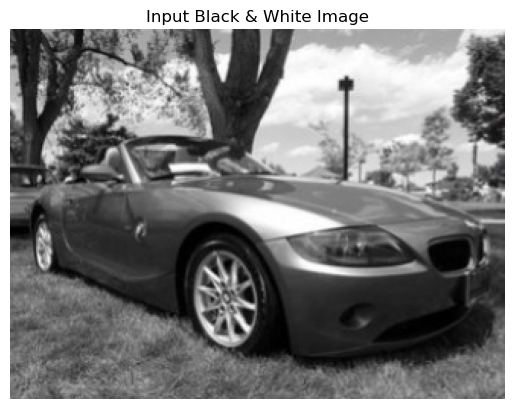

In [6]:
rgb_img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.title("Input Black & White Image")
plt.axis('off')
plt.show()

In [7]:
input_width = 224
input_height = 224
rgb_img = (frame[:, :, [2, 1, 0]] * 1.0 / 255).astype(np.float32)
lab_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2Lab)
l_channel = lab_img[:, :, 0]
l_channel_resize = cv.resize(l_channel, (input_width, input_height))
l_channel_resize -= 50

In [8]:
Caffe_net.setInput(cv.dnn.blobFromImage(l_channel_resize))
ab_channel = Caffe_net.forward()[0, :, :, :].transpose((1, 2, 0))

In [9]:
(original_height, original_width) = rgb_img.shape[:2]
ab_channel_us = cv.resize(ab_channel, (original_width, original_height))
lab_output = np.concatenate((l_channel[:, :, np.newaxis], ab_channel_us), axis=2)
bgr_output = np.clip(cv.cvtColor(lab_output, cv.COLOR_Lab2BGR), 0, 1)

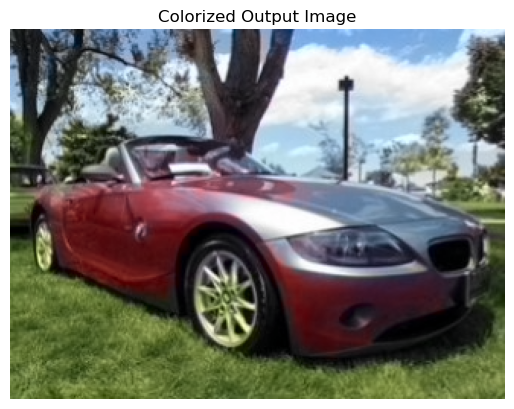

In [10]:
cv.imwrite("./result.png", (bgr_output * 255).astype(np.uint8))

frame1 = cv.imread("result.png")
rgb_img = cv.cvtColor(frame1, cv.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.title("Colorized Output Image")
plt.axis('off')
plt.show()

In [11]:
import os

In [12]:
required_files = [
    "pts_in_hull.npy",
    "models/colorization_deploy_v2.prototxt",
    "models/colorization_release_v2.caffemodel"
]

for file in required_files:
    if os.path.exists(file):
        print(f"✅ Found: {file}")
    else:
        print(f"❌ Missing: {file}")

✅ Found: pts_in_hull.npy
✅ Found: models/colorization_deploy_v2.prototxt
✅ Found: models/colorization_release_v2.caffemodel


In [13]:
print("Current directory files:", os.listdir('.'))
print("Models directory files:", os.listdir('models'))


Current directory files: ['-p', '.ipynb_checkpoints', 'image other.jpg', 'models', 'new.jpg', 'pts_in_hull.npy', 'result.png', 'Untitled.ipynb']
Models directory files: ['colorization_deploy_v2.prototxt', 'colorization_release_v2.caffemodel']


In [14]:
!pip install numpy opencv-python matplotlib pillow


In [15]:
%%writefile gui.py
# (Paste the entire GUI code here, starting from 'import tkinter as tk' ...)


Writing gui.py
